# Regresión lineal MÚLTIPLE
## Varias variables independientes, una dependiente 
$$x_{1}, x_{2}, x_{3}, ... x_{n},    y $$

In [1]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Regresión lineal
from sklearn import linear_model    ## pip install sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  #métricas de una regresión lineal
from sklearn.model_selection import train_test_split #Para dividir los datos en entrenmiento/test

,c1,c2,c3,c4,cf
c1,1.000000,-0.080493,-0.027758,-0.022037,0.577396
c2,-0.080493,1.000000,-0.195395,-0.051378,0.437551
c3,-0.027758,-0.195395,1.000000,-0.081735,0.494365
c4,-0.022037,-0.051378,-0.081735,1.000000,0.118983
cf,0.577396,0.437551,0.494365,0.118983,1.000000


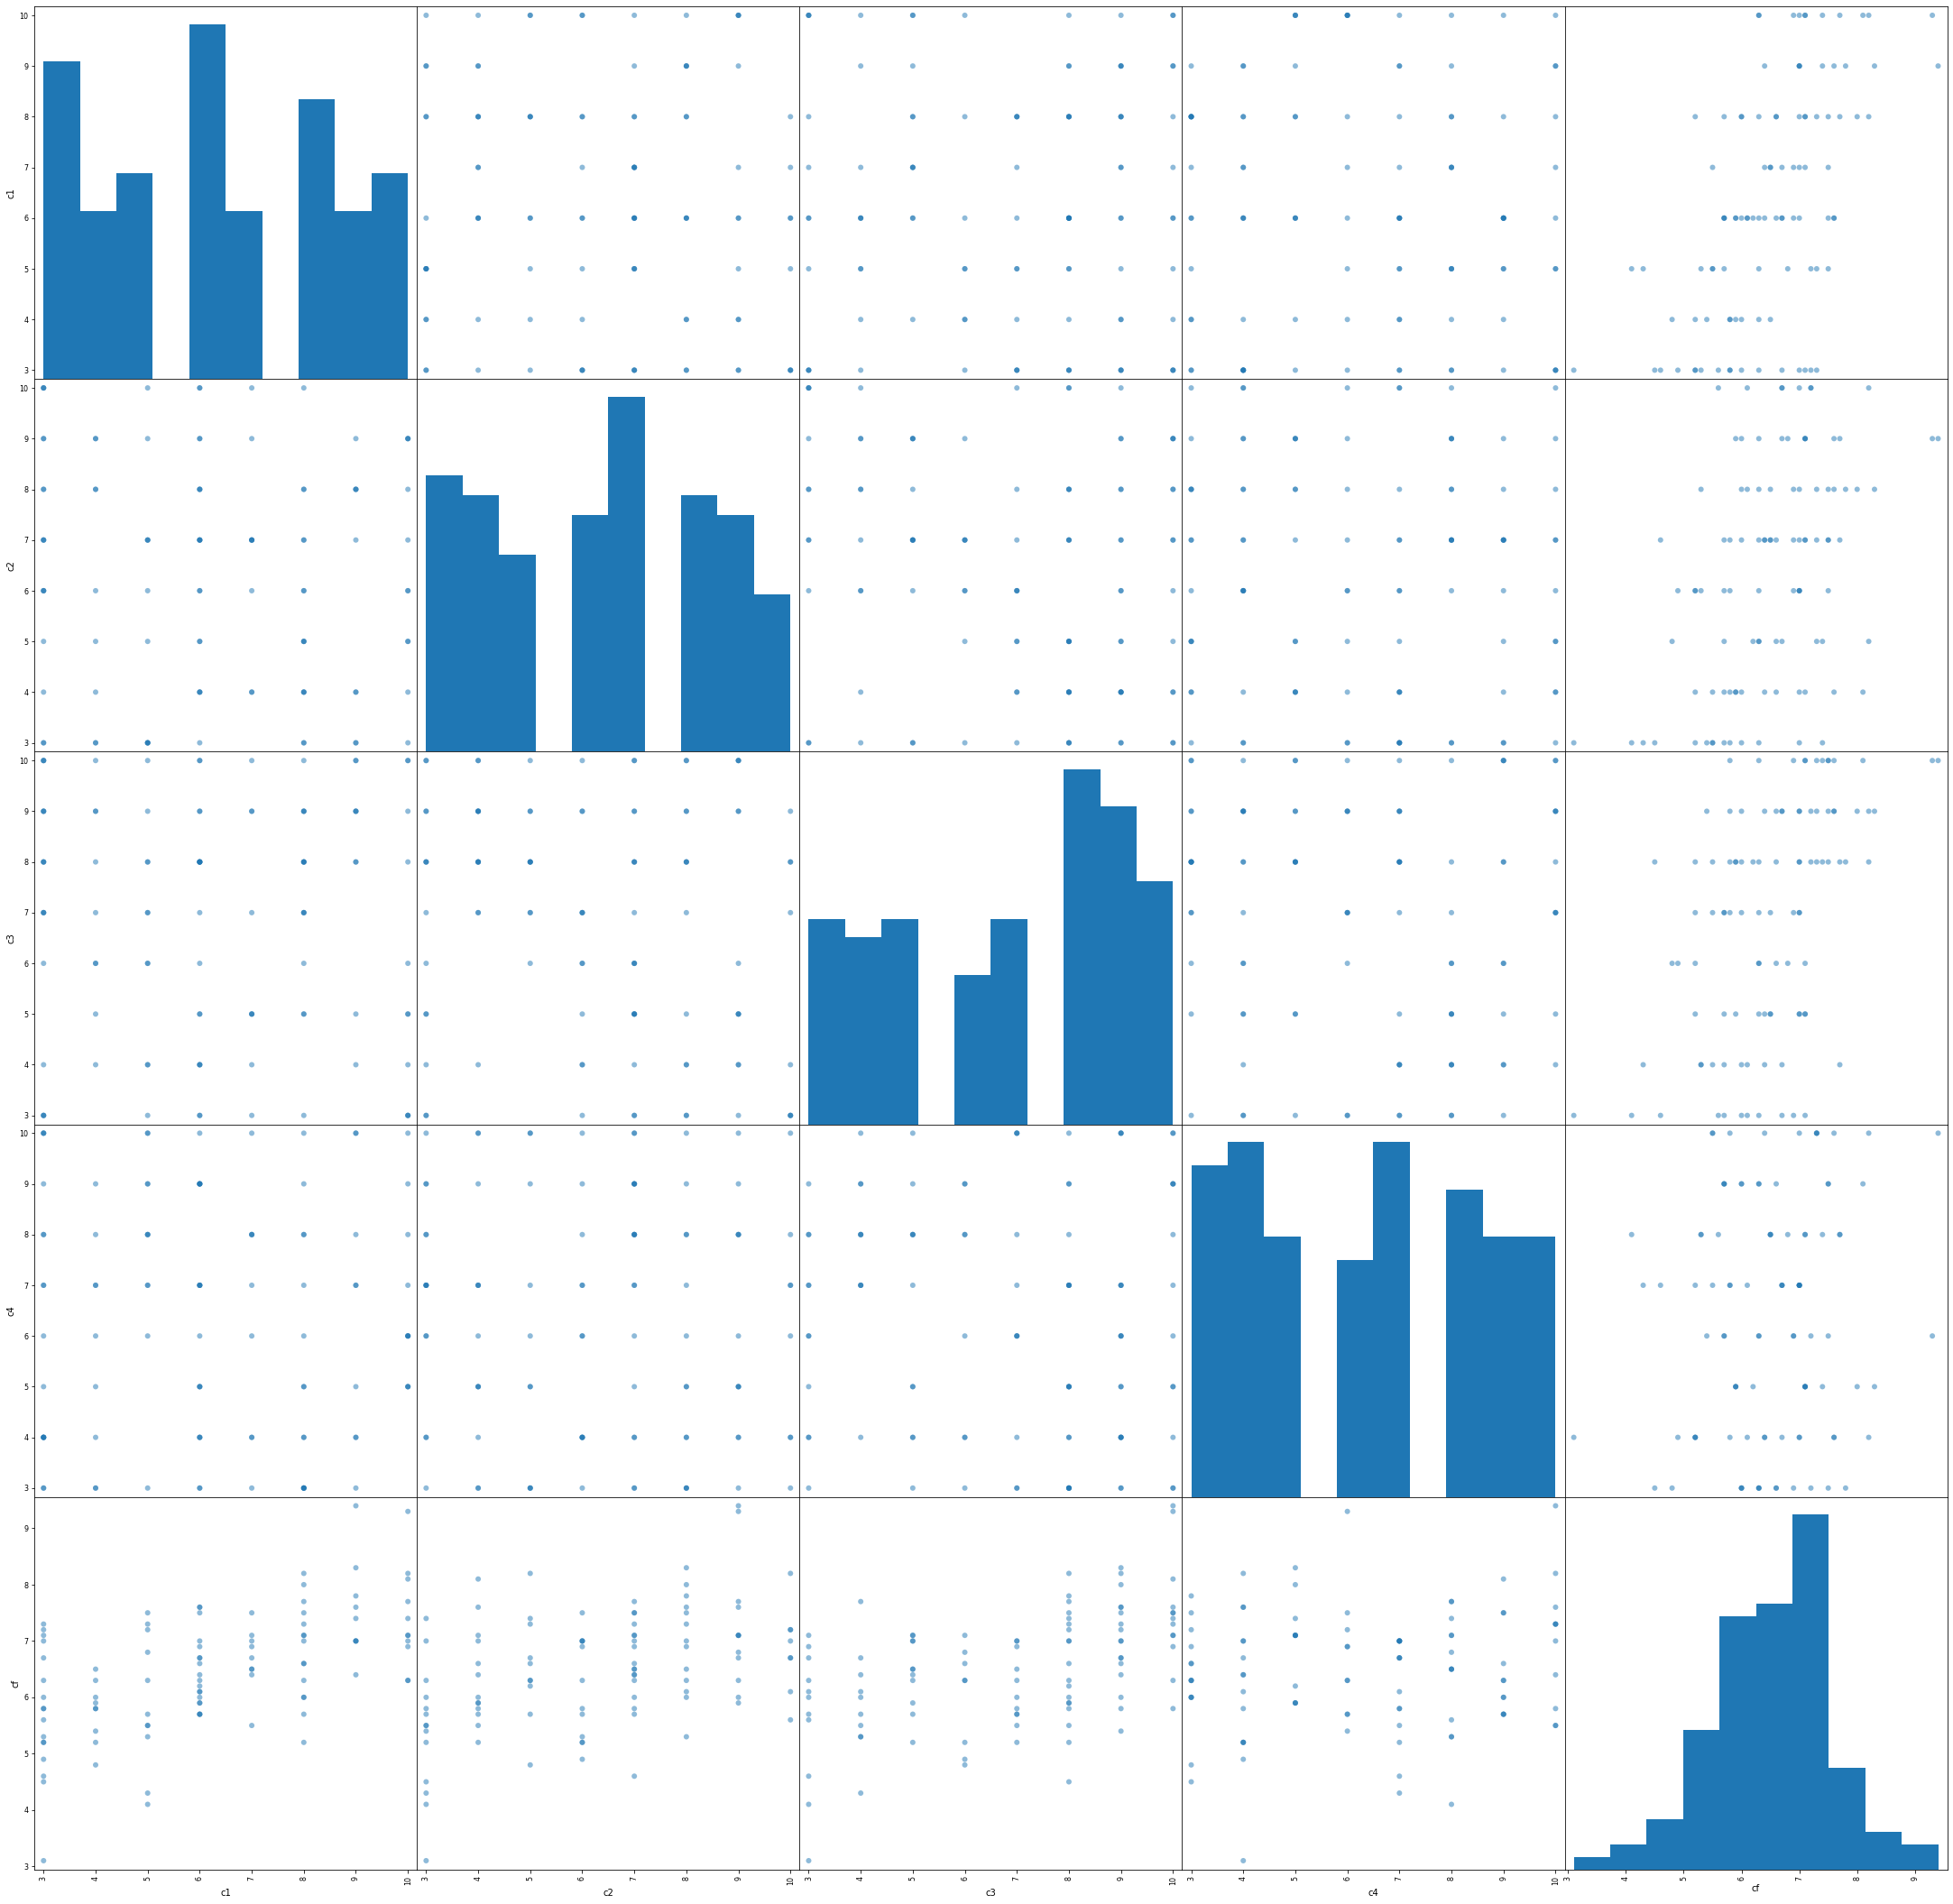

In [2]:
dfOriginal = pd.read_csv ("./datosEntrada/CalificacionesUNAM.csv");
cuantosRegistros = len(dfOriginal.index)  #Cuántos registros de procesarán (TODOS en este caso)
pd.plotting.scatter_matrix(dfOriginal,figsize=(38,38), marker="@");#,grid=True, diagonal="kde", alpha=0.8);
dfOriginal.corr()

## Separación en datos de entrenamiento y de prueba

In [3]:
xs = dfOriginal.iloc[ :  , [0,1,2,3]]   #Primeras 4 columnas (xs)
ys = dfOriginal.iloc[ :  , [4]]   #Segunda columna (ys)

#Dividir los datos en entrenamiento y datos de prueba
X_ent, X_pru, y_ent, y_pru = train_test_split(xs, ys, test_size=0.3, random_state=19173)
#random_state es una semilla para que sea reproducible el experimento

In [4]:
print ("Datos de entrenamiento",len(X_ent), len (y_ent));
print ("Datos de prueba",len(X_pru), len (y_pru));
X_ent

Datos de entrenamiento 70 70
Datos de prueba 30 30


,c1,c2,c3,c4
15,3,3,3,4
4,3,3,8,3
87,3,6,7,10
1,4,5,6,3
59,10,9,10,6
...,...,...,...,...
93,8,6,9,6
14,4,3,9,6
9,6,8,10,4
24,4,6,6,4


In [5]:
# Datos de prueba
X_pru

,c1,c2,c3,c4
40,8,3,5,4
57,3,10,3,8
58,3,7,9,3
83,7,7,5,8
48,10,6,3,6
62,6,5,9,7
0,7,7,5,8
97,3,6,7,4
88,3,7,8,4
70,5,5,7,6


In [6]:
reg = linear_model.LinearRegression()   #Creación del modelo
reg.fit(X_ent, y_ent) #Entrenamiento del modelo con los datos de entrada

LinearRegression()

## Coeficientes
Arreglos bidimensionales .coef_ y .intercept_

In [7]:
print ("Coeficientes de x",reg.coef_)  #Arreglo bidimensional
print ("Coeficiente independiente", reg.intercept_)

print ("y = ", str(round(reg.intercept_[0],3)), end="")   #Arreglo bidimensional
indice=1
for x in reg.coef_[0]:
    print (" + (",str(round(x,3))+")x_"+str(indice), end="", sep="")
    indice += 1


Coeficientes de x [[0.3 0.3 0.3 0.1]]
Coeficiente independiente [-1.77635684e-15]
y =  -0.0 + (0.3)x_1 + (0.3)x_2 + (0.3)x_3 + (0.1)x_4

## Predicción

In [8]:
yPredicha = reg.predict (X_pru)  #es la "y gorrito"

## Métricas

In [9]:
mae = mean_absolute_error(y_pru, yPredicha)
R2  = r2_score(y_pru, yPredicha)
print ("Media aritmética", yPredicha.mean())
print ()
print ("MAE =",mae)
print ()
print ("R^2=",R2)

Media aritmética 6.373333333333332

MAE = 9.769962616701378e-16

R^2= 1.0


# Regresión lineal MÚLTIPLE con variable **no lineal** (y división de datos en entrenamiento y prueba)
## Carga de datos

,largo,ancho,precio
largo,1.000000,-0.054047,0.643499
ancho,-0.054047,1.000000,0.650561
precio,0.643499,0.650561,1.000000


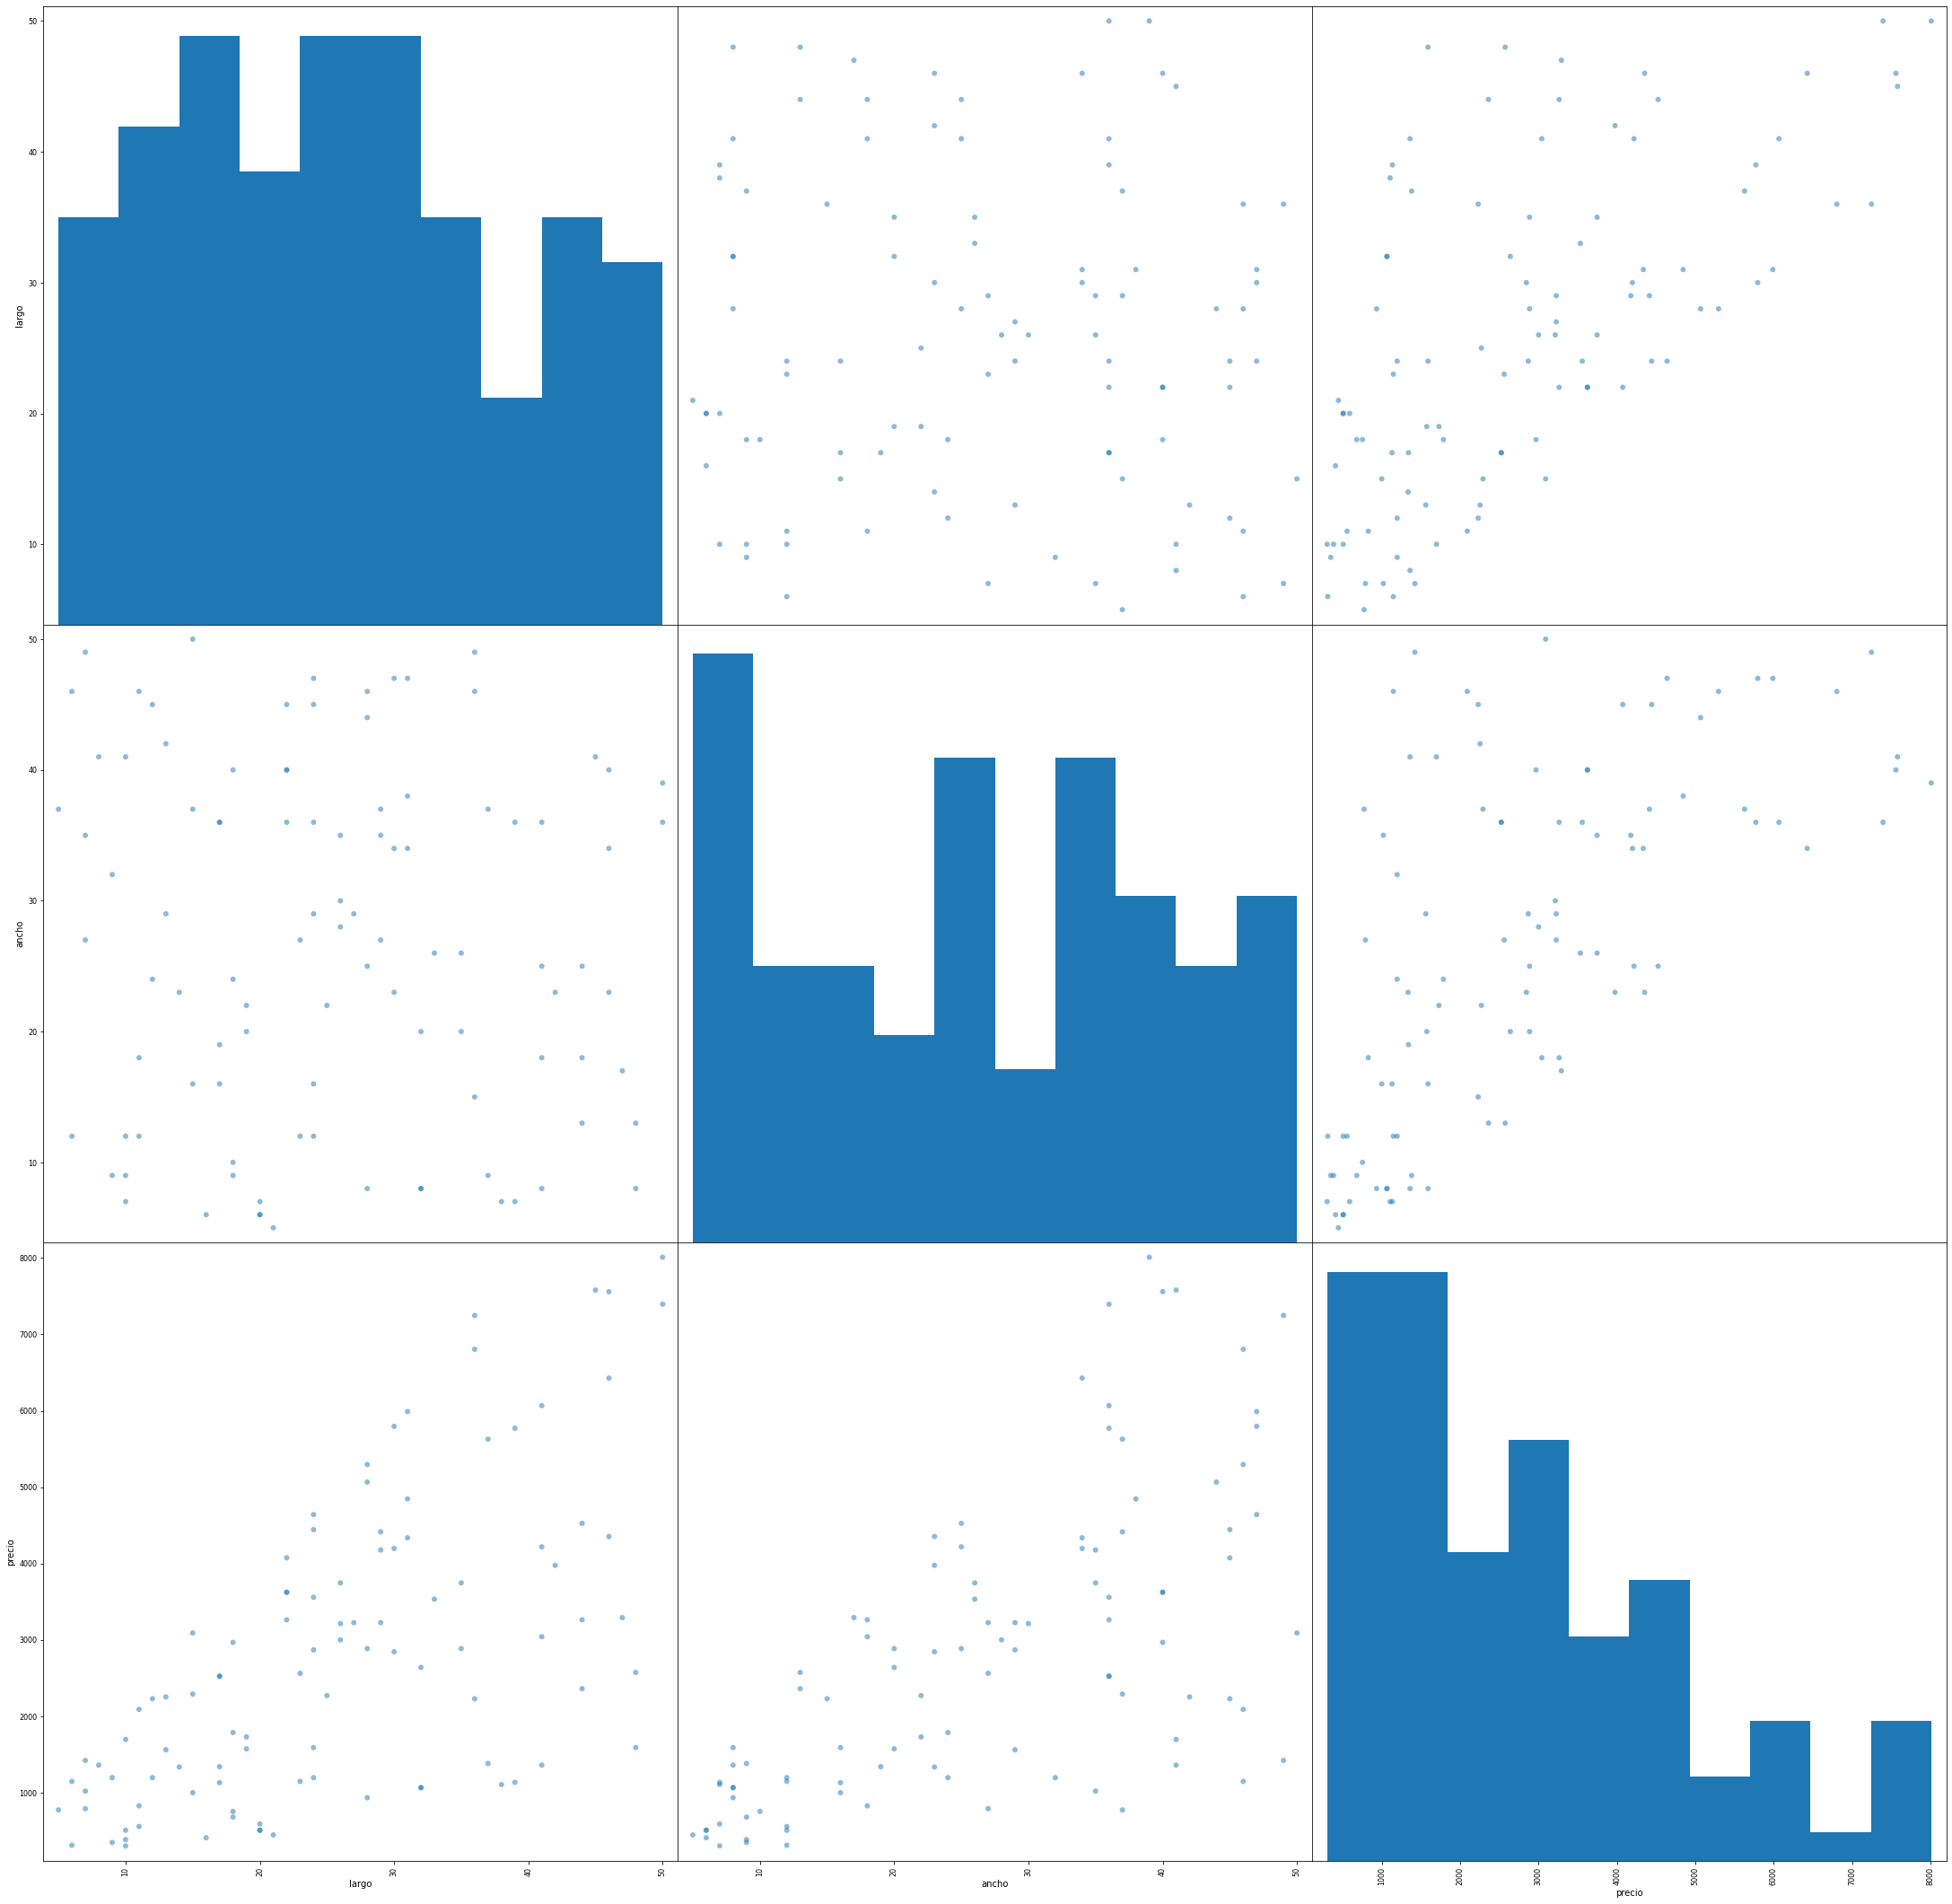

In [10]:
dfMultiple = pd.read_csv ("./datosEntrada/cajas02.csv");
cuantosRegistros = len(dfMultiple.index)  #Cuántos registros de procesarán (TODOS en este caso)
pd.plotting.scatter_matrix(dfMultiple,figsize=(38,38), marker="@");#,grid=True, diagonal="kde", alpha=0.8);
dfMultiple.corr()

## Separación de datos de entrenamiento y prueba

In [11]:
xs = dfMultiple.iloc[ : cuantosRegistros+1 , [0,1]]   #Primera columna (xs)
ys = dfMultiple.iloc[ : cuantosRegistros+1 , [2]]   #Segunda columna (ys)

#Dividir los datos en entrenamiento y datos de prueba
X_ent, X_pru, y_ent, y_pru = train_test_split(xs, ys, test_size=0.3, random_state=19173)
#random_state es una semilla para que sea reproducible el experimento
xs

,largo,ancho
0,24,45
1,21,5
2,37,9
3,16,6
4,10,7
...,...,...
95,18,24
96,27,29
97,9,32
98,30,47


In [12]:
X_ent

,largo,ancho
15,15,37
4,10,7
87,22,36
1,21,5
59,8,41
...,...,...
93,29,35
14,31,47
9,41,25
24,17,36


## Creación del modelo de regresión lineal múltiple

In [13]:
reg = linear_model.LinearRegression()
reg.fit(X_ent, y_ent)

LinearRegression()

## Prueba (predicción)

In [14]:
yPredicha = reg.predict (X_pru)

## Coeficientes

In [15]:
print ("Coeficientes de x",reg.coef_)  #Arreglo bidimensional
print ("Coeficiente independiente", reg.intercept_)

print ("y = ", str(round(reg.intercept_[0],3)), end="")   #Arreglo bidimensional
indice=1
for x in reg.coef_[0]:
    print (" + (",str(round(x,3))+")x_"+str(indice), end="", sep="")
    indice += 1


Coeficientes de x [[114.16289221  98.4947221 ]]
Coeficiente independiente [-2775.33535076]
y =  -2775.335 + (114.163)x_1 + (98.495)x_2

## Métricas

In [16]:
mae = mean_absolute_error(y_pru, yPredicha)
R2  = r2_score(y_pru, yPredicha)
print ("Media aritmética", yPredicha.mean())
print ()
print ("MAE =",mae)
print ()
print ("R^2=",R2)

Media aritmética 2645.41842704134

MAE = 429.99629069107414

R^2= 0.8729848834501673


In [17]:
import datetime as dt
print ("Fin del notebook", dt.datetime.today())

Fin del notebook 2021-10-14 20:05:06.988215
